In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# Create engine using the `hawaii.sqlite` database file
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# Declare a Base using `automap_base()`
Base = automap_base()
# Use the Base class to reflect the database tables
Base.prepare(autoload_with=engine)

In [6]:
# Print all of the classes mapped to the Base
Base.classes.keys()

['measurement', 'station']

In [7]:
# Assign the measurement class to a variable called `Measurement` and
# the station class to a variable called `Station`
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create a session
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

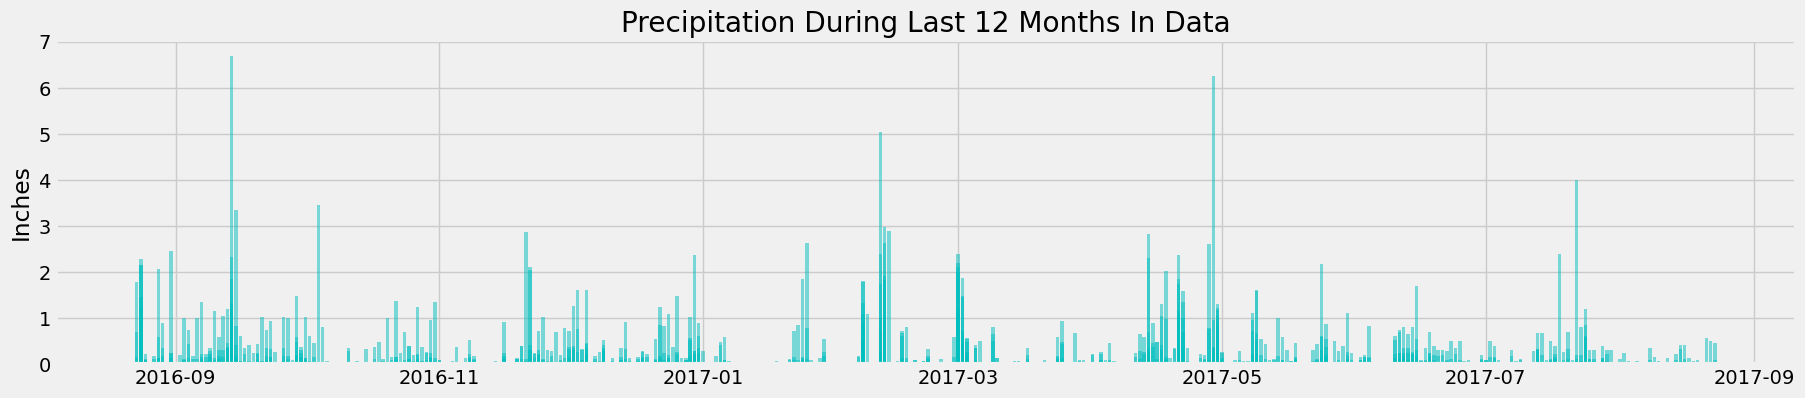

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.

# Starting from the most recent data point in the database.
last_date = dt.date(2017,8,23)

# Calculate the date one year from the last date in data set.
start_date = last_date - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
rain_data = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= start_date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(rain_data)
df = df.dropna(how='any')
df.rename(columns={'date':'Date', 'prcp':'Precipitation'}, inplace=True)

# Sort the dataframe by date
df.sort_values(by=['Date'])

# Use Pandas Plotting with Matplotlib to plot the data
df['Date'] = df['Date'].astype('datetime64[ns]') 

plt.figure(figsize=(20,4))
plt.bar(df['Date'], df['Precipitation'], color='c', alpha=0.5, align="center")
plt.title('Precipitation During Last 12 Months In Data')
plt.ylabel('Inches')
plt.show()

In [146]:
# Use Pandas to calculate the summary statistics for the precipitation data
df['Precipitation'].describe()

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: Precipitation, dtype: float64

# Exploratory Station Analysis

In [158]:
# Design a query to calculate the total number of stations in the dataset
session.query(Station.id).count()

9

In [167]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
sel1 = [Measurement.station, 
       func.count(Measurement.id)]
station_measure_cnt = session.query(*sel1).group_by(Measurement.station).order_by(func.count(Measurement.id).desc()).all()
station_measure_cnt

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [174]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
sel2 = [Measurement.station, 
       func.min(Measurement.tobs), 
       func.max(Measurement.tobs), 
       func.avg(Measurement.tobs)]
station_temp = session.query(*sel2).\
    filter(Measurement.station == 'USC00519281').all()
station_temp

[('USC00519281', 54.0, 85.0, 71.66378066378067)]

In [184]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

In [188]:
# Find the most recent measure date in that station.
session.query(Measurement.date).filter(Measurement.station == 'USC00519281').order_by(Measurement.date.desc()).first()

('2017-08-18',)

In [199]:
# get last 12 months temperature data from that station
last_date = dt.date(2017,8,18)
start_date = last_date - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
temperature_data = session.query(Measurement.station, Measurement.date, Measurement.tobs).\
    filter(Measurement.date >= start_date).\
    filter(Measurement.station == 'USC00519281').all()
    

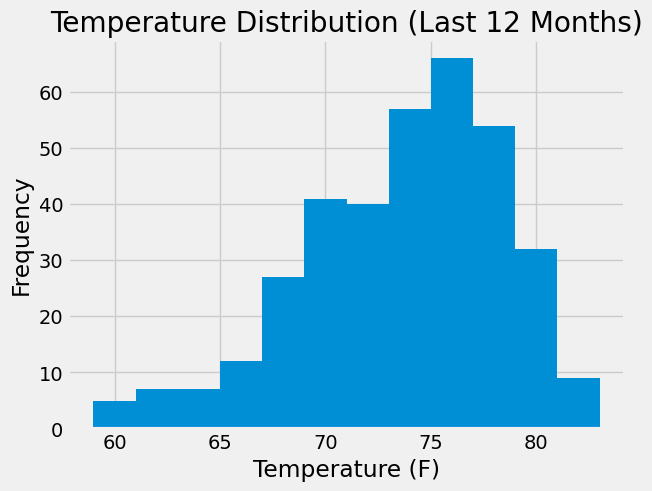

In [201]:
# add into data frame and plot
temperature_df = pd.DataFrame(temperature_data)
temperature_df = temperature_df.dropna(how='any')
temperature_df.rename(columns={'date':'Date', 'tobs':'Temperature'}, inplace=True)
temperature_df.sort_values(by=['Date'])

plt.hist(temperature_df['Temperature'], bins=12)
plt.xlabel('Temperature (F)')
plt.ylabel('Frequency')
plt.title('Temperature Distribution (Last 12 Months)')
plt.show()

# Close Session

In [198]:
# Close Session
session.close()
